# Assessment for Advanced Data Science

## Christian Cabrera, Carl Henrik Ek and Neil D. Lawrence

### 29th October 2021



Welcome to the course assessment for the Advanced Data Science unit. In this assessment you will build a prediction system for UK house prices. 

Your prediction system will be based on data from the UK Price Paid data available [here](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads). By combining this data with the UK Office for National Statistics data on the latitude/longitude of postcodes (available [here](https://www.getthedata.com/open-postcode-geo)) you will have a record of house prices and their approximate latitude/longitude. Due to the size of these data you will use a relational database to handle them.  

To make predictions of the house price you will augment your data with information obtained from Open Street Map: an open license source of mapping information. You will use the techniques you have learnt in the course to indentify and incorporate useful features for house price prediction.



Alongside your implementation you will provide a short repository overview describing how you have implemented the different parts of the project and where you have placed those parts in your code repository. You will submit your code alongside a version of this notebook that will allow your examiner to understand and reconstruct the thinking behind your analysis. This notebook is structured to help you in creating that description and allow you to understand how we will allocate the marks. You should make use of the Fynesse framework (<https://github.com/lawrennd/fynesse_template>) for structuring your code. 

Remember the notebook you create should *tell a story*, any code that is not critical to that story can safely be placed into the associated analysis library and imported for use (structured as given in the Fynesse template)

The maximum total mark for this assessment is 20. That mark is split into Three Questions below, each worth 5 marks each. Then a final 5 marks will be given for the quality, structure and reusability of the code and analysis you produce giving 20 marks in total.


### Useful Links

You may find some of the following links useful when building your system.

University instuctions on Security and Privacy with AWS.

https://help.uis.cam.ac.uk/service/network-services/hosting-services/AWS/aws-security-privacy

Security Rules in AWS 

https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/USER_VPC.Scenarios.html#USER_VPC.Scenario4

### Installing Your Library

One artefact to be included in your submission is a python library structured according to the "Access, Assess, Address" standard for data science solutions. You will submit this library alongside your code. Use the cell below to perform the necessary installation instructions for your library.

You should base your module on the template repository given by the Fynesse template repository. That should make it `pip` installable as below. 



In [ ]:
%pip install osmnx
%pip install ipython-sql
%pip install -U PyYAML
%pip install PyMySQL
%pip install pymssql
%load_ext sql

In [15]:
# Install your library here, for example the fynesse template 
# is set up to be pip installable
%pip uninstall fynesse
%pip install git+https://github.com/AnaRadu24/fynesse.git

Found existing installation: fynesse 0.1.0
Uninstalling fynesse-0.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/fynesse-0.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/fynesse/*
Proceed (y/n)? 
Your response ('') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled fynesse-0.1.0
  Cloning https://github.com/AnaRadu24/fynesse.git to /tmp/pip-req-build-a_rwgn3p
  Running command git clone -q https://github.com/AnaRadu24/fynesse.git /tmp/pip-req-build-a_rwgn3p
  Created wheel for fynesse: filename=fynesse-0.1.0-py3-none-any.whl size=14104 sha256=7c4cf87717402f7caeee3caecd01c953a4c77927d6f43bb122b5ce8cf59d4e92
  Stored in directory: /tmp/pip-ephem-wheel-cache-fl5lujmz/wheels/fb/ff/a4/f6f238c6c7c46cf22a8c45c26902df8fab369ff32504e8f5a0
Successfully built fynesse


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/fynesse-0.1.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


Your own library should be installed in the line above, then you can import it as usual (where you can either replace `fynesse` with the name you've given your analysis module or you can leave the name as `fynesse` as you prefer).

To protect the passowrd, I create a credentials.yaml file locally that will store the username and password so that the client can access the server without ever showing your password in the notebook. Please introduce your database credentials in the fields below.

In [1]:
import fynesse
from fynesse import access
from fynesse import assess
from fynesse import address
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


interactive(children=(Text(value='', description='Username:'), Password(description='Password:'), Button(descr…

## Question 1. Accessing a Database of House Prices, Latitudes and Longitudes

The UK price paid data for housing in dates back to 1995 and contains millions of transactions. The size of the data makes it unwieldy to manipulate directly in python frameworks such as `pandas`. As a result we will host the data in a *relational database*. 

Using the following ideas.

1. A cloud hosted database (such as MariaDB hosted on the AWS RDS service).
2. The SQL language wrapped in appropriately structured python code.
3. Joining of two databases.

You will construct a database containing tables that contain all house prices, latitudes and longitudes from the UK house price data base since 1995.

You will likely find the following resources helpful.

1. Lecture 1, 2 and 3.
2. Lab class 1 and 2.
3. The UK Price Paid data for houses: <https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads>
4. The UK ONS Data base of postcode latitude and longitudes:  <https://www.getthedata.com/open-postcode-geo>

Below we provide codeboxes and hints to help you develop your answer.

*The main knowledge you need to do a first pass through this question will have been taught by the end of Lab Session 2 (11th November 2021). You will likely want to review your answer as part of **refactoring** your code  and analysis pipeline shortly before hand in.*

*5 Marks*

### Task A

Set up the database. You'll need to set up a database on AWS. You were guided in how to do this in the lab sessions. You should be able to use the same database instance you created in the lab, or you can delete that and start with a fresh instance. You'll remember from the lab that the database requires credentials (username, password) to access. It's good practice to store those credentials *outside* the notebook so you don't accidentally share them by e.g. checking code into a repository. 
  
Call the database you use for this assessment `property_prices`.
  

In [ ]:
# Write code for requesting and storing credentials (username, password) here. 
import yaml
from ipywidgets import interact_manual, Text, Password
@interact_manual(username=Text(description="Username:"), 
                 password=Password(description="Password:"))
def write_credentials(username, password):
    with open("credentials.yaml", "w") as file:
        credentials_dict = {'username': username, 
                            'password': password}
        yaml.dump(credentials_dict, file)

interactive(children=(Text(value='', description='Username:'), Password(description='Password:'), Button(descr…

In [2]:
# Write any other setup code you need for setting up database access here.
database_details = {"url": 'database-amr97.cgrre17yxw11.eu-west-2.rds.amazonaws.com', 
                    "port": 3306, "database": 'property_prices'} # please change if you want to connect to a different database
conn = access.create_connection(database_details)

### Task B

Create a database table called `pp_data` containing all the UK Price Paid data from the [gov.uk site](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads). You'll need to prepare a new table to receive the data and upload the UK Price Paid data to your database instance. The total data is over 3 gigabytes in size. We suggest that rather than downloading the full data in CSV format, you use the fact that they have split the data into years and into different parts per year. For example, the first part of the data for 2018 is stored at <http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018-part1.csv>. Each of these files is less than 100MB and can be downloaded very quickly to local disk, then uploaded using 


```
LOCAL DATA LOAD INFILE 'filename' INTO TABLE `table_name`
FIELDS TERMINATED BY ',' 
LINES STARTING BY '' TERMINATED BY '\n';
```
*Note* this command should be wrapped and placed in an appropriately structured python module. 

Each 'data part' should be downloadable from the `gov.uk` site and uploadable to your database instance in a couple of seconds. By looping across the years and different parts, you should be able to robustly upload this large data set to your database instance in a matter of minutes. 

You may find the following schema useful in creation of your database:

```
--
-- Table structure for table `pp_data`
--
DROP TABLE IF EXISTS `pp_data`;
CREATE TABLE IF NOT EXISTS `pp_data` (
  `transaction_unique_identifier` tinytext COLLATE utf8_bin NOT NULL,
  `price` int(10) unsigned NOT NULL,
  `date_of_transfer` date NOT NULL,
  `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
  `property_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `new_build_flag` varchar(1) COLLATE utf8_bin NOT NULL,
  `tenure_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `primary_addressable_object_name` tinytext COLLATE utf8_bin NOT NULL,
  `secondary_addressable_object_name` tinytext COLLATE utf8_bin NOT NULL,
  `street` tinytext COLLATE utf8_bin NOT NULL,
  `locality` tinytext COLLATE utf8_bin NOT NULL,
  `town_city` tinytext COLLATE utf8_bin NOT NULL,
  `district` tinytext COLLATE utf8_bin NOT NULL,
  `county` tinytext COLLATE utf8_bin NOT NULL,
  `ppd_category_type` varchar(2) COLLATE utf8_bin NOT NULL,
  `record_status` varchar(2) COLLATE utf8_bin NOT NULL,
  `db_id` bigint(20) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1 ;
```
This schema is written by Dale Potter and can be found on Github here: <https://github.com/dalepotter/uk_property_price_data/blob/master/create_db.sql>

You may also find it helpful to set up the following indexes in the database

```
--
-- Indexes for table `pp_data`
--
ALTER TABLE `pp_data`
ADD PRIMARY KEY (`db_id`);
MODIFY `db_id` bigint(20) unsigned NOT NULL AUTO_INCREMENT,AUTO_INCREMENT=1;
CREATE INDEX `pp.postcode` USING HASH
  ON `pp_data`
    (postcode);
CREATE INDEX `pp.date` USING HASH
  ON `pp_data` 
    (date_of_transfer);
```


In the box below, briefly describe what the schema is doing and why we will find it useful to create the indexes we have for the table we've created.

The schema provides a structured way of looking at data, telling both the programmer and the database what to expect when inputing values into the table. Specifing indexes in a schema allows for optimisations when joining or quering databases as they sort the records for an efficient search. 

Hence, we make postocde an index as we will join pp_data with postcode_data on this column and date_of_transfer as we will select rows for training from a particular time range.

In [ ]:
# Write the code you need for creating the database table and uploading the data here.
access.upload_pp_database(conn)

In [ ]:
pd.DataFrame(access.select_top(conn, 'pp_data',  5), columns=access.PP_COLUMNS)

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,new_build_flag,tenure_type,primary_addressable_object_name,secondary_addressable_object_name,street,locality,town_city,district,county,record_status,ppd_category_type,db_id
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07,MK15 9HP,D,N,F,31,,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A,1
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,SR6 0AQ,T,N,F,50,,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A,2
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,CO6 1SQ,T,N,F,19,,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A,3
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,B90 4TG,T,N,F,37,,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A,4
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,DY5 1SA,S,N,F,59,,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A,5


### Task C

Create a database table called `postcode_data` containing the ONS Postcode information. <GetTheData.com> has organised data derived from the UK Office for National Statistics into a convenient CSV file. You can find details [here](https://www.getthedata.com/open-postcode-geo).


The data you need can be found at this url: <https://www.getthedata.com/downloads/open_postcode_geo.csv.zip>. It will need to be unzipped before use.

You may find the following schema useful for the postcode data (developed by Christian and Neil)

```
USE `property_prices`;
--
-- Table structure for table `postcode_data`
--
DROP TABLE IF EXISTS `postcode_data`;
CREATE TABLE IF NOT EXISTS `postcode_data` (
  `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
  `status` enum('live','terminated') NOT NULL,
  `usertype` enum('small', 'large') NOT NULL,
  `easting` int unsigned,
  `northing` int unsigned,
  `positional_quality_indicator` int NOT NULL,
  `country` enum('England', 'Wales', 'Scotland', 'Northern Ireland', 'Channel Islands', 'Isle of Man') NOT NULL,
  `lattitude` decimal(11,8) NOT NULL,
  `longitude` decimal(10,8) NOT NULL,
  `postcode_no_space` tinytext COLLATE utf8_bin NOT NULL,
  `postcode_fixed_width_seven` varchar(7) COLLATE utf8_bin NOT NULL,
  `postcode_fixed_width_eight` varchar(8) COLLATE utf8_bin NOT NULL,
  `postcode_area` varchar(2) COLLATE utf8_bin NOT NULL,
  `postcode_district` varchar(4) COLLATE utf8_bin NOT NULL,
  `postcode_sector` varchar(6) COLLATE utf8_bin NOT NULL,
  `outcode` varchar(4) COLLATE utf8_bin NOT NULL,
  `incode` varchar(3)  COLLATE utf8_bin NOT NULL,
  `db_id` bigint(20) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
```

And again you'll want to set up indices for your table.

```
ALTER TABLE `postcode_data`
ADD PRIMARY KEY (`db_id`);
MODIFY `db_id` bigint(20) unsigned NOT NULL AUTO_INCREMENT,AUTO_INCREMENT=1;
CREATE INDEX `po.postcode` USING HASH
  ON `postcode_data`
    (postcode);
```

And you can load the CSV file into the table in one "INFILE".

```
LOAD DATA LOCAL INFILE 'open_postcode_geo.csv' INTO TABLE `postcode_data`
FIELDS TERMINATED BY ',' 
LINES STARTING BY '' TERMINATED BY '\n';
```

In [ ]:
# Write the code you need for creating the database table and uploading the data here.
access.upload_postcode_data(conn)

In [ ]:
pd.DataFrame(access.select_top(conn, 'postcode_data',  5), columns=access.POSTCODE_COLUMNS)

,postcode,status,usertype,easting,northing,positional_quality_indicator,country,latitude,longitude,postcode_no_space,postcode_fixed_width_seven,postcode_fixed_width_eight,postcode_area,postcode_district,postcode_sector,outcode,incode,db_id
0,AB1 0AA,terminated,small,385386,801193,1,Scotland,57.10147400,-2.24285100,AB10AA,AB1 0AA,AB1 0AA,AB,AB1,AB1 0,AB1,0AA,1
1,AB1 0AB,terminated,small,385177,801314,1,Scotland,57.10255400,-2.24630800,AB10AB,AB1 0AB,AB1 0AB,AB,AB1,AB1 0,AB1,0AB,2
2,AB1 0AD,terminated,small,385053,801092,1,Scotland,57.10055600,-2.24834200,AB10AD,AB1 0AD,AB1 0AD,AB,AB1,AB1 0,AB1,0AD,3
3,AB1 0AE,terminated,small,384600,799300,8,Scotland,57.08444400,-2.25570800,AB10AE,AB1 0AE,AB1 0AE,AB,AB1,AB1 0,AB1,0AE,4
4,AB1 0AF,terminated,large,384460,800660,8,Scotland,57.09665600,-2.25810200,AB10AF,AB1 0AF,AB1 0AF,AB,AB1,AB1 0,AB1,0AF,5


### Task D 

These data can now be joined to form a new table that contains house price paid and latitude longitude of the house. We could create a new table that contains all this information. However, the computation of that table will take some time because of the size of the two existing tables in the join. 

Instead, we're going to exploit the nature of the task. To build our prediction model, we're going to use the prices for a particular region in a given time period. This means we can select that region and time period and build the joined data only from the relevent rows from the two tables. This will save time on the join.

Whether this is a good idea or not in a live system will depend on how often these predictions are required. If it's very often, it would likely be better to store the entired database joined, because the one-off cost for that join is amortised across all the future predictions. If only a few predictions are required (like in our lab class) then doing that join on the fly might be better. In that case you can make use of an  *inner join* for this data set creation.

```
USE `property_prices`;
--
-- Table structure for table `prices_coordinates_data`
--
DROP TABLE IF EXISTS `prices_coordinates_data`;
CREATE TABLE IF NOT EXISTS `prices_coordinates_data` (
  `price` int(10) unsigned NOT NULL,
  `date_of_transfer` date NOT NULL,
  `postcode` varchar(8) COLLATE utf8_bin NOT NULL,
  `property_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `new_build_flag` varchar(1) COLLATE utf8_bin NOT NULL,
  `tenure_type` varchar(1) COLLATE utf8_bin NOT NULL,
  `locality` tinytext COLLATE utf8_bin NOT NULL,
  `town_city` tinytext COLLATE utf8_bin NOT NULL,
  `district` tinytext COLLATE utf8_bin NOT NULL,
  `county` tinytext COLLATE utf8_bin NOT NULL,
  `country` enum('England', 'Wales', 'Scotland', 'Northern Ireland', 'Channel Islands', 'Isle of Man') NOT NULL,
  `lattitude` decimal(11,8) NOT NULL,
  `longitude` decimal(10,8) NOT NULL,
  `db_id` bigint(20) unsigned NOT NULL
) DEFAULT CHARSET=utf8 COLLATE=utf8_bin AUTO_INCREMENT=1 ;


```



In [ ]:
# Write the code you need for creating the database table and uploading the data here.
access.upload_prices_coordinates_data(conn, latitude=53.110, longitude=-2.444, property_type='T', date = "2020-06-19",  box_radius=0.01)

In [ ]:
pd.DataFrame(access.select_top(conn, 'prices_coordinates_data',  5), columns=access.PRICES_COORDINATES_COLUMNS)

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure_type,locality,town_city,district,county,country,latitude,longitude,db_id
0,74000,2020-01-03,CW1 4BS,T,N,F,,CREWE,CHESHIRE EAST,CHESHIRE EAST,England,53.10323500,-2.43979700,1
1,98700,2020-01-10,CW1 4GJ,T,N,L,,CREWE,CHESHIRE EAST,CHESHIRE EAST,England,53.11489300,-2.43706300,2
2,62000,2020-01-23,CW1 2PN,T,N,F,,CREWE,CHESHIRE EAST,CHESHIRE EAST,England,53.10139500,-2.44388500,3
3,69000,2020-01-24,CW1 2PJ,T,N,F,,CREWE,CHESHIRE EAST,CHESHIRE EAST,England,53.10116800,-2.44679500,4
4,88000,2020-01-24,CW1 4BQ,T,N,F,,CREWE,CHESHIRE EAST,CHESHIRE EAST,England,53.10239700,-2.43500900,5


## Question 2. Accessing OpenStreetMap and Assessing the Available Features

In question 3 you will be given the task of constructing a prediction system for property price levels at a given location. We expect that knowledge of the local region around the property should be helpful in making those price predictions. To evaluate this we will now look at [OpenStreetMap](https://www.openstreetmap.org) as a data source.

The tasks below will guide you in accessing and assessing the OpenStreetMap data. The code you write will eventually be assimilated in your python module, but documentation of what you've included and why should remain in the notebook below. 

Accessing OpenStreetMap through its API can be done using the python library `osmx`. Using what you have learned about the `osmx` interface in the lectures, write general code for downloading points of interest and other relevant information that you believe may be useful for predicting house prices. Remembering the perspectives we've taken on *data science as debugging*, the remarks we've made when discussing *the data crisis* of the importance of reusability in data analysis, and the techniques we've explored in the labsessions for visualising features and exploring their correlation use the notebook to document your assessment of the OpenStreetMap data as a potential source of data.

The knowledge you need to do a first pass through this question will have been taught by end of lab session three (16th November 2021). You will likely want to review your answer as part of *refactoring* your code and analysis pipeline shortly before hand in.

You should write reusable code that allows you to explore the characteristics of different points of interest. Looking ahead to question 3 you'll want to incorporate these points of interest in your prediction code.

*5 marks*


For a faster visualization of the data, in prices_coordinates_data database I cached a subset of the joined information from pp_data and postcode_data. The datapoints of interest can then be extracted with the select_cached(conn, city, district, property_type, date, date_range) function which queries the prices_coordinates_data database and returns the relevant rows.

By default, in upload_prices_coordinates_data(conn), I chose to add house prices for all types of houses from Waltham Forest, London and from Cambridge over 10 years, from 2010 to 2020.

More datapoints can be added by calling cache_prices_coordinates_data(conn, city, district, property_type, date, date_range, limit).

In [5]:
access.upload_prices_coordinates_data(conn)
access.print_rows(access.select_top(conn, 'prices_coordinates_data', 10))

(580000, datetime.date(2019, 5, 10), 'E4 6PY', 'S', 'N', 'F', '', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', Decimal('51.62536500'), Decimal('-0.00723300'), 1)
(405000, datetime.date(2016, 1, 22), 'E4 6NU', 'S', 'N', 'F', '', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', Decimal('51.61849700'), Decimal('-0.00106200'), 2)
(330000, datetime.date(2012, 9, 7), 'E4 7LR', 'S', 'N', 'F', 'CHINGFORD', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', Decimal('51.63125600'), Decimal('-0.01152600'), 3)
(415000, datetime.date(2017, 6, 29), 'E4 6JL', 'S', 'N', 'F', '', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', Decimal('51.62281000'), Decimal('0.00548400'), 4)
(700000, datetime.date(2015, 10, 7), 'E4 7EN', 'S', 'N', 'F', '', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', Decimal('51.63163400'), Decimal('0.00218900'), 5)
(675000, datetime.date(2019, 4, 30), 'E4 6NS', 'S', 'N', 'F', '', 'LONDON', 'WALTHAM FOREST', 'GREATER LONDON', 'England', D

In [11]:
pd.DataFrame(access.select_top(conn, 'prices_coordinates_data',  5), columns=access.PRICES_COORDINATES_COLUMNS)

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure_type,locality,town_city,district,county,country,latitude,longitude,db_id
0,580000,2019-05-10,E4 6PY,S,N,F,,LONDON,WALTHAM FOREST,GREATER LONDON,England,51.62536500,-0.00723300,1
1,405000,2016-01-22,E4 6NU,S,N,F,,LONDON,WALTHAM FOREST,GREATER LONDON,England,51.61849700,-0.00106200,2
2,330000,2012-09-07,E4 7LR,S,N,F,CHINGFORD,LONDON,WALTHAM FOREST,GREATER LONDON,England,51.63125600,-0.01152600,3
3,415000,2017-06-29,E4 6JL,S,N,F,,LONDON,WALTHAM FOREST,GREATER LONDON,England,51.62281000,0.00548400,4
4,700000,2015-10-07,E4 7EN,S,N,F,,LONDON,WALTHAM FOREST,GREATER LONDON,England,51.63163400,0.00218900,5


In [3]:
CREWE_S_1999 = {"latitude":53.357, "longitude":-1.489, "property_type":'S', "date": "1999-12-31", "town_city": 'CREWE', "district": 'CHESHIRE EAST',	"county": 'CHESHIRE EAST'}
CREWE_S_2020 = {"latitude":53.357, "longitude":-1.489, "property_type":'S', "date": "2020-06-30", "town_city": 'CREWE', "district": 'CHESHIRE EAST',	"county": 'CHESHIRE EAST'}
CREWE_T_2020 = {"latitude":53.110, "longitude":-2.444, "property_type":'T', "date": "2020-06-30", "town_city": 'CREWE', "district": 'CHESHIRE EAST',	"county": 'CHESHIRE EAST'}
SURREY_D_2015 = {"latitude":51.381, "longitude":-0.254, "property_type":'D', "date": "2015-12-31", "town_city": 'WORCESTER PARK', "district": 'EPSOM AND EWELL',	"county": 'SURREY'}
WALTHAM_FOREST_F_2015 = {"latitude":51.63163400, "longitude":0.00218900, "property_type":'F', "date": "2015-10-07", "town_city": 'LONDON', "district": 'WALTHAM FOREST',	"county": 'GREATER LONDON'}


In [ ]:
# Use this cell and cells below for summarising your analysis and documenting your decision making.

I started looking at the price distribution on the map to see how the house **prices vary according to the latitude and longitude**. From the map we can see **houses from the same price ranges are aggregated in specific zones** - ie. expensive houses appear to be near each other (forming the 'rich areas'). This evidence support the idea that the latitude and longitude are important features in predicting house prices.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


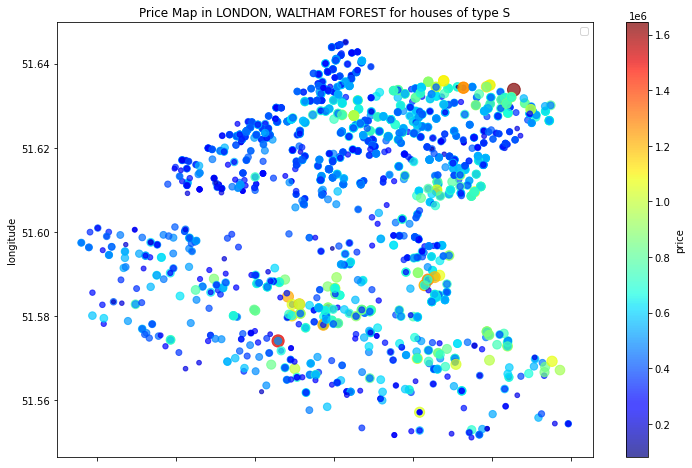

In [6]:
assess.plot_lat_long_price(conn, city='LONDON', district='WALTHAM FOREST', property_type='S', date='2020-12-30', date_range=3650)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


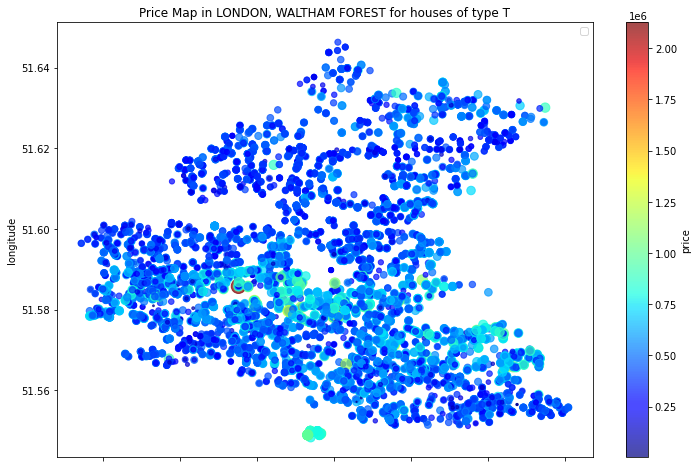

In [47]:
assess.plot_lat_long_price(conn, city='LONDON', district='WALTHAM FOREST', property_type='T', date='2020-12-30', date_range=3650)

I was also interestd how important the distance is for price prediction. As we can see, the prices start diverging after 2km and so there is **no point in using training data further than 1-2km from the prediction point**. 

<Figure size 1008x432 with 0 Axes>

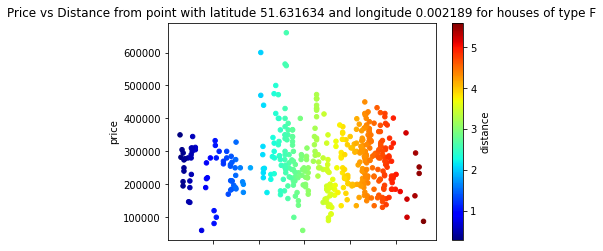

In [11]:
assess.plot_price_distance(conn, WALTHAM_FOREST_F_2015["latitude"], WALTHAM_FOREST_F_2015["longitude"], WALTHAM_FOREST_F_2015["date"], WALTHAM_FOREST_F_2015["property_type"], date_range=180, box_radius=0.04)

Further, I looked at the price-date relationship to determine the **price trends** and the best date range for the data in the training set.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


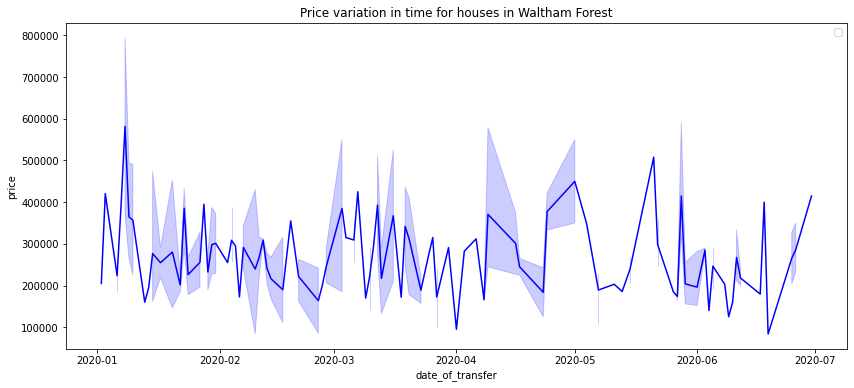

In [14]:
assess.plot_price_in_time(conn, CREWE_S_2020["latitude"], CREWE_S_2020["longitude"], CREWE_S_2020["date"], CREWE_S_2020["property_type"])

As we can see, the prices over the years fluctuate significantly, but over the course of a 3-6 months period the average & distributions seem stable, so **predicting a house price based on the information gathered in the neighbourhood from the last 6 months** (to make sure we have enough datapoints) should make more accurate predictions.

<Figure size 1008x432 with 0 Axes>

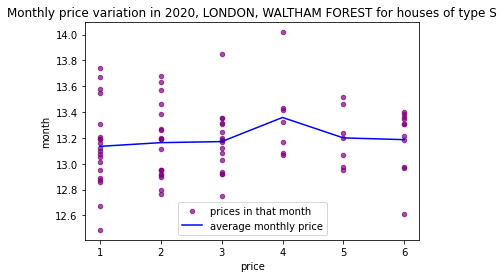

<Figure size 1008x432 with 0 Axes>

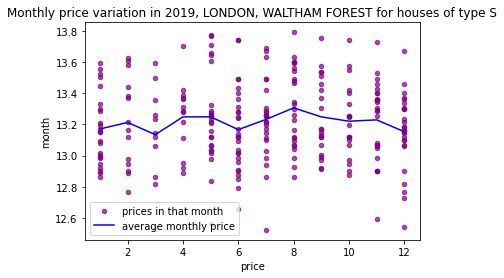

<Figure size 1008x432 with 0 Axes>

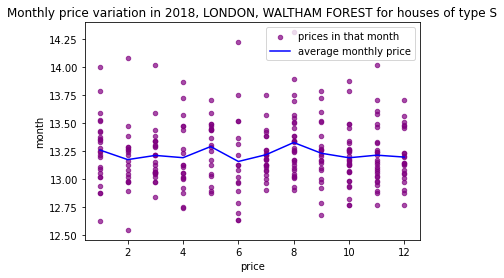

<Figure size 1008x432 with 0 Axes>

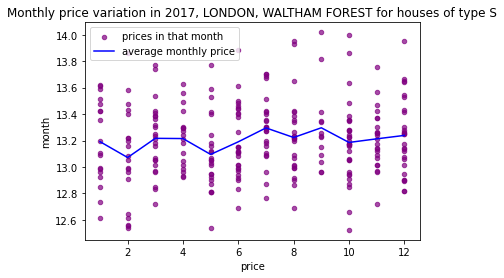

<Figure size 1008x432 with 0 Axes>

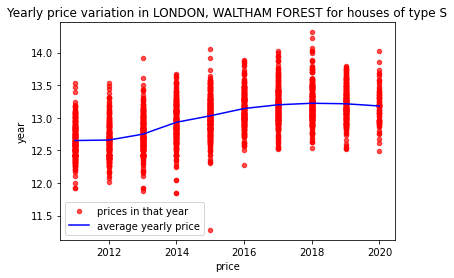

In [3]:
assess.plot_monthly_price(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2020-12-30', 365)
assess.plot_monthly_price(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2019-12-30', 365)
assess.plot_monthly_price(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2018-12-30', 365)
assess.plot_monthly_price(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2017-12-30', 365)
assess.plot_yearly_price(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2020-12-30', 3650)

To **chose a prediction model**, I analyzed the price distribution for houses of one type in a city over half a year. The graphs show the price tends to follow a **Poisson distribution** so I will try to fit prices for a specific property type under a Generalized Linear Model following a Poisson distribution.

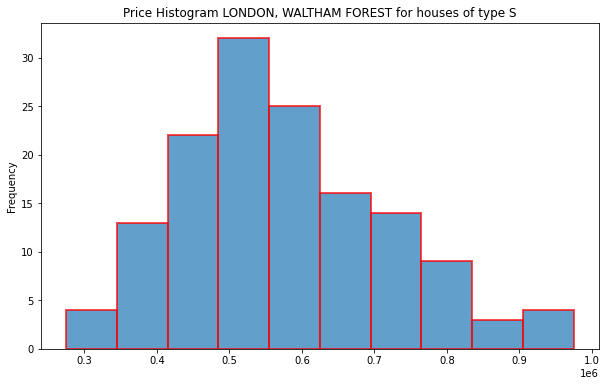

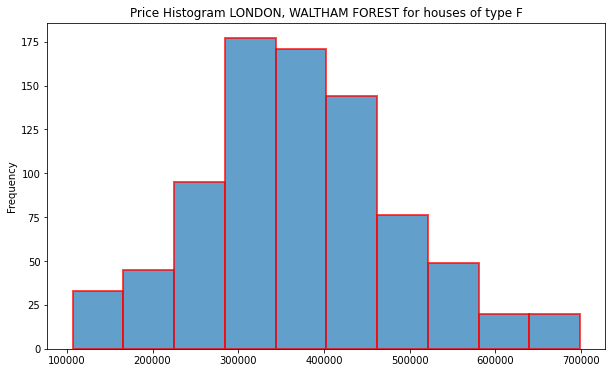

In [7]:
assess.plot_price_histograms(conn, 'LONDON', 'WALTHAM FOREST', 'S', '2019-12-30', 180)
assess.plot_price_histograms(conn, 'LONDON', 'WALTHAM FOREST', 'F', '2019-12-30', 180)

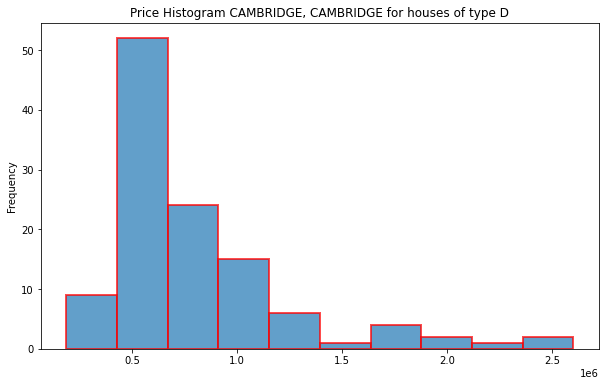

In [70]:
assess.plot_price_histograms(conn, 'CAMBRIDGE', 'CAMBRIDGE', 'D', '2019-06-30', 180)

Looking at the type of property, we see the average type of a detached house is higher than the average price of a flat (as expected) for example.

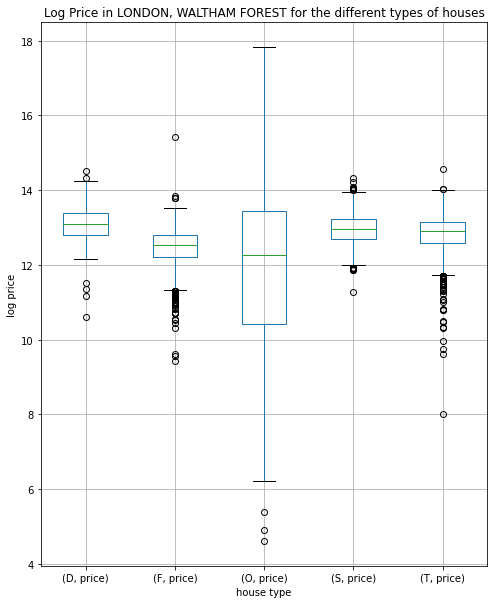

In [21]:
assess.plot_property_type_boxplot(conn, 'LONDON', 'WALTHAM FOREST')

Plotting the distributions for each type of house, it becomes obvious the data comes from Poisson distributions but with different parameters for different types of houses. Therefore, I choose to **predict** the price of a house of a certain type based on the previous prices around that location of house of only the **same type**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


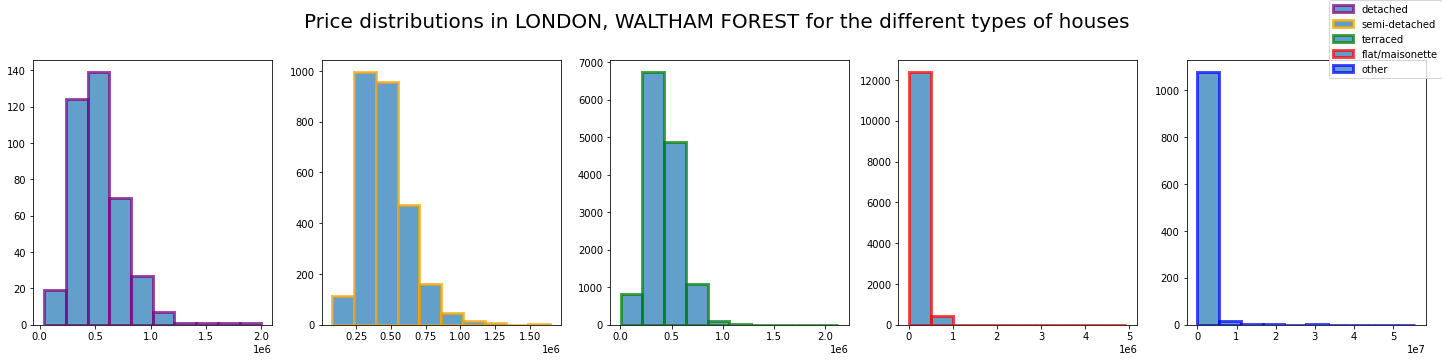

In [52]:
assess.plot_house_types_distributions(conn, 'LONDON', 'WALTHAM FOREST')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


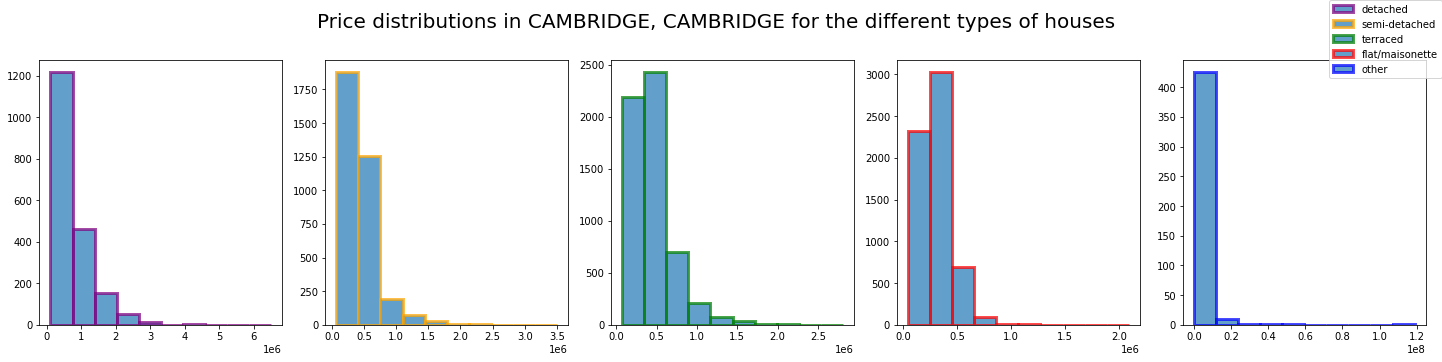

In [53]:
assess.plot_house_types_distributions(conn, 'CAMBRIDGE', 'CAMBRIDGE')

As a final step, I used the POIS data to help determine the reputation of a neighbourhood by looking at **how many amenity, leisure, shops, healthcare centers, sport centers and public transport stops are nearby**. These sould increase the value of the hosue as they are necessities people tend to look for, in general willing, to pay more. However, afer some **threshold (15)**, the exact number of amenities of the same type won't matter as much anymore - ie. living near a shopping center with 30 shops & grocery stores is the same as living near 15 since people will be selective and choose to visit only a few because of the time limitations.

In [ ]:
assess.view_pois_points(latitude=CREWE_T_2020["latitude"], longitude=CREWE_T_2020["longitude"])

Around point with latitude 53.11 and logitutde -2.444 on a radius of 0.555km there are a number of pois points of type: 
amenity: 15.0
leisure: 7.0
shop: 3.0
healthcare: 1.0
sport: 3.0
public_transport: 8.0


## Question 3. Addressing a Property Price Prediction Question

For your final tick, we will be asking you to make house price predictions for a given location, date and property type in the UK. You will provide a function that takes input a latitude and longitude as well as the `property_type` (either type" of property (either `F` - flat, `S` - semidetached, `D` - detached, `T` - terraced or `O` other). Create this function in the `address.py` file, for example in the form,

```
def predict_price(latitude, longitude, date, property_type):
    """Price prediction for UK housing."""
    pass
```

We suggest that you use the following approach when building your prediction. 

1. Select a bounding box around the housing location in latitude and longitude.
2. Select a data range around the prediction date. 
3. Use the data ecosystem you have build above to build a training set from the relevant time period and location in the UK. Include appropriate features from OSM to improve the prediction.
4. Train a linear model on the data set you have created.
5. Validate the quality of the model.
6. Provide a prediction of the price from the model, warning appropriately if your validation indicates the quality of the model is poor.

The knowledge you need to do a first pass through this question will have been taught by end of lab session four (25th November 2021). You will likely want to review your answer as part of *refactoring* your code shortly before hand in.



To recap, given a desired location (latitude and longitude), house type and date, the predictor is **trained based on the sold houses in the previous 6 months, of the same type, on a radius of 2km** around the location. 

The model is a **Poisson regression model**. The **features** I chose to train the model with consist of the **geographical coordinates** (latitude & longitude) and **number of POIS points** in the immediate neighbourhood of the house. 

In [ ]:
WALTHAM_FOREST_F_2015 = {"latitude":51.572, "longitude":0.015, "property_type":'T', "date": "2019-12-30", "town_city": 'LONDON', "district": 'WALTHAM FOREST',	"county": 'GREATER LONDON'}
assess.view_prediction_accuracy(conn, WALTHAM_FOREST_F_2015["latitude"], WALTHAM_FOREST_F_2015["longitude"], WALTHAM_FOREST_F_2015["date"], WALTHAM_FOREST_F_2015["property_type"])

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1133: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  start_params = np.zeros(self.exog.shape[1], np.float)


,date_of_transfer,new_build_flag,tenure_type,property_type,town_city,district,county,longitude,latitude,price,price_prediction
30,2020-05-22,N,F,T,CREWE,CHESHIRE EAST,CHESHIRE EAST,-2.45146700,53.10373900,72000,81053
36,2020-06-05,N,F,T,CREWE,CHESHIRE EAST,CHESHIRE EAST,-2.45010100,53.10022100,125000,72724
27,2020-05-12,N,F,T,CREWE,CHESHIRE EAST,CHESHIRE EAST,-2.43914500,53.11400400,135000,119491
4,2020-01-24,N,F,T,CREWE,CHESHIRE EAST,CHESHIRE EAST,-2.43500900,53.10239700,88000,78152
10,2020-02-24,N,F,T,CREWE,CHESHIRE EAST,CHESHIRE EAST,-2.44155100,53.10094500,72000,139121


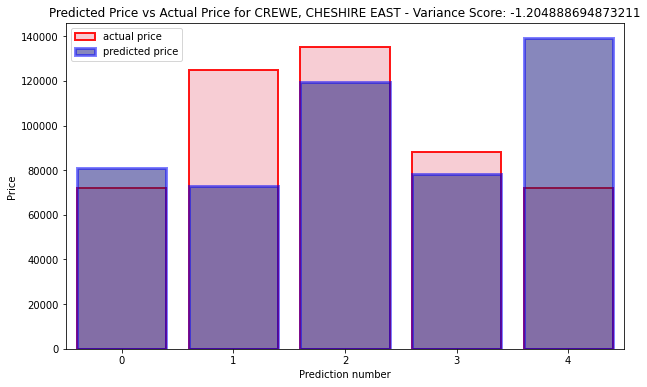

In [14]:
assess.view_prediction_accuracy(conn, latitude=53.110, longitude=-2.444, property_type='T', date = "2020-06-19")

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/

,date_of_transfer,new_build_flag,tenure_type,property_type,town_city,district,county,longitude,latitude,price,price_prediction
28,2015-10-29,N,F,D,EPSOM,EPSOM AND EWELL,SURREY,-0.24116000,51.36245000,545000,511816
37,2015-11-10,N,F,D,NEW MALDEN,KINGSTON UPON THAMES,GREATER LONDON,-0.25571300,51.39718100,753000,712113
11,2015-08-14,N,F,D,WORCESTER PARK,EPSOM AND EWELL,SURREY,-0.26368800,51.36954900,519500,502473
34,2015-11-06,N,F,D,WORCESTER PARK,KINGSTON UPON THAMES,GREATER LONDON,-0.26042200,51.38369900,540000,1014526
2,2015-07-10,N,F,D,WORCESTER PARK,SUTTON,GREATER LONDON,-0.23678100,51.37934400,450000,538128
30,2015-11-02,N,F,D,NEW MALDEN,KINGSTON UPON THAMES,GREATER LONDON,-0.26007300,51.40061800,591000,1565820


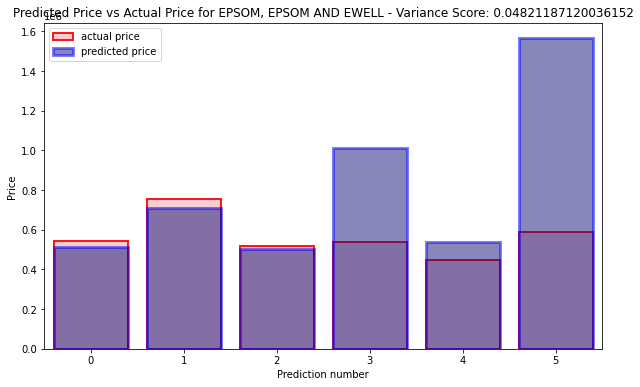

In [3]:
address.view_prediction_accuracy(conn, latitude=51.381, longitude=-0.254, property_type='D', date = "2015-12-31")

In [6]:
address.make_prediction(conn, latitude=53.110, longitude=-2.444, property_type='T', date = "2020-06-19")
address.make_prediction(conn, latitude=51.381, longitude=-0.254, property_type='D', date = "2015-12-31")
address.make_prediction(conn, latitude=50.770, longitude=0.130, property_type='F', date = "2002-12-31")
address.make_prediction(conn, latitude=53.357, longitude=-1.489, property_type='S', date = "1999-12-31")

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1133: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  start_params = np.zeros(self.exog.shape[1], np.float)


Predicted price for a house of type Tat latitude 53.11 and longitude -2.444 in 2020-06-19 based on the houses sold in the previous 180 on a radius of 0.555km is 63432


/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/

Predicted price for a house of type Dat latitude 51.381 and longitude -0.254 in 2015-12-31 based on the houses sold in the previous 180 on a radius of 0.555km is 460197


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1133: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  start_params = np.zeros(self.exog.shape[1], np.float)


Predicted price for a house of type Fat latitude 50.77 and longitude 0.13 in 2002-12-31 based on the houses sold in the previous 180 on a radius of 0.555km is 82607


/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Predicted price for a house of type Sat latitude 53.357 and longitude -1.489 in 1999-12-31 based on the houses sold in the previous 180 on a radius of 0.555km is 97911


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1133: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  start_params = np.zeros(self.exog.shape[1], np.float)


97911

In [ ]:
address.view_prediction_accuracy(conn, latitude=50.770, longitude=0.130, property_type='F', date = "2002-12-31")

In [ ]:
address.view_prediction_accuracy(conn, latitude=53.357, longitude=-1.489, property_type='S', date = "1999-12-31")